In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir(r'D:\MachineLearning\Project\Datasets')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber_data_analysis.ipynb']

In [3]:
uber_15 = pd.read_csv('uber-raw-data-janjune-15_sample.csv')

In [4]:
uber_15.shape

(100000, 4)

In [5]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [6]:
uber_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Dispatching_base_num  100000 non-null  object
 1   Pickup_date           100000 non-null  object
 2   Affiliated_base_num   98882 non-null   object
 3   locationID            100000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [7]:
# Check number of duplicates
uber_15.duplicated().sum()

np.int64(54)

In [8]:
# Remove duplicates
uber_15.drop_duplicates(inplace=True)

In [9]:
uber_15.shape

(99946, 4)

In [10]:
# Check number of missing values
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [11]:
# Checking data type
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [12]:
uber_15['Pickup_date']

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
99995    2015-04-13 16:12:00
99996    2015-03-06 21:32:00
99997    2015-03-19 19:56:00
99998    2015-05-02 16:02:00
99999    2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: object

In [13]:
# Converting Pickup_date to data time dtype
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'])

In [14]:
uber_15['Pickup_date']

0       2015-05-02 21:43:00
1       2015-01-20 19:52:59
2       2015-03-19 20:26:00
3       2015-04-10 17:38:00
4       2015-03-23 07:03:00
                ...        
99995   2015-04-13 16:12:00
99996   2015-03-06 21:32:00
99997   2015-03-19 19:56:00
99998   2015-05-02 16:02:00
99999   2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: datetime64[ns]

### In which month have max. Uber Pickup in New York City?

In [15]:
# Extracting day, month, and year from uber_15['Pickup_date']
uber_15['Date'] = uber_15['Pickup_date'].dt.date
uber_15['Day'] = uber_15['Pickup_date'].dt.day
uber_15['Month'] = uber_15['Pickup_date'].dt.month
uber_15['Month_name'] = uber_15['Pickup_date'].dt.month_name()
uber_15['Year'] = uber_15['Pickup_date'].dt.year

uber_15.drop('Date',axis=1,inplace=True)

In [16]:
uber_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Dispatching_base_num  99946 non-null  object        
 1   Pickup_date           99946 non-null  datetime64[ns]
 2   Affiliated_base_num   98830 non-null  object        
 3   locationID            99946 non-null  int64         
 4   Day                   99946 non-null  int32         
 5   Month                 99946 non-null  int32         
 6   Month_name            99946 non-null  object        
 7   Year                  99946 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(3)
memory usage: 5.7+ MB


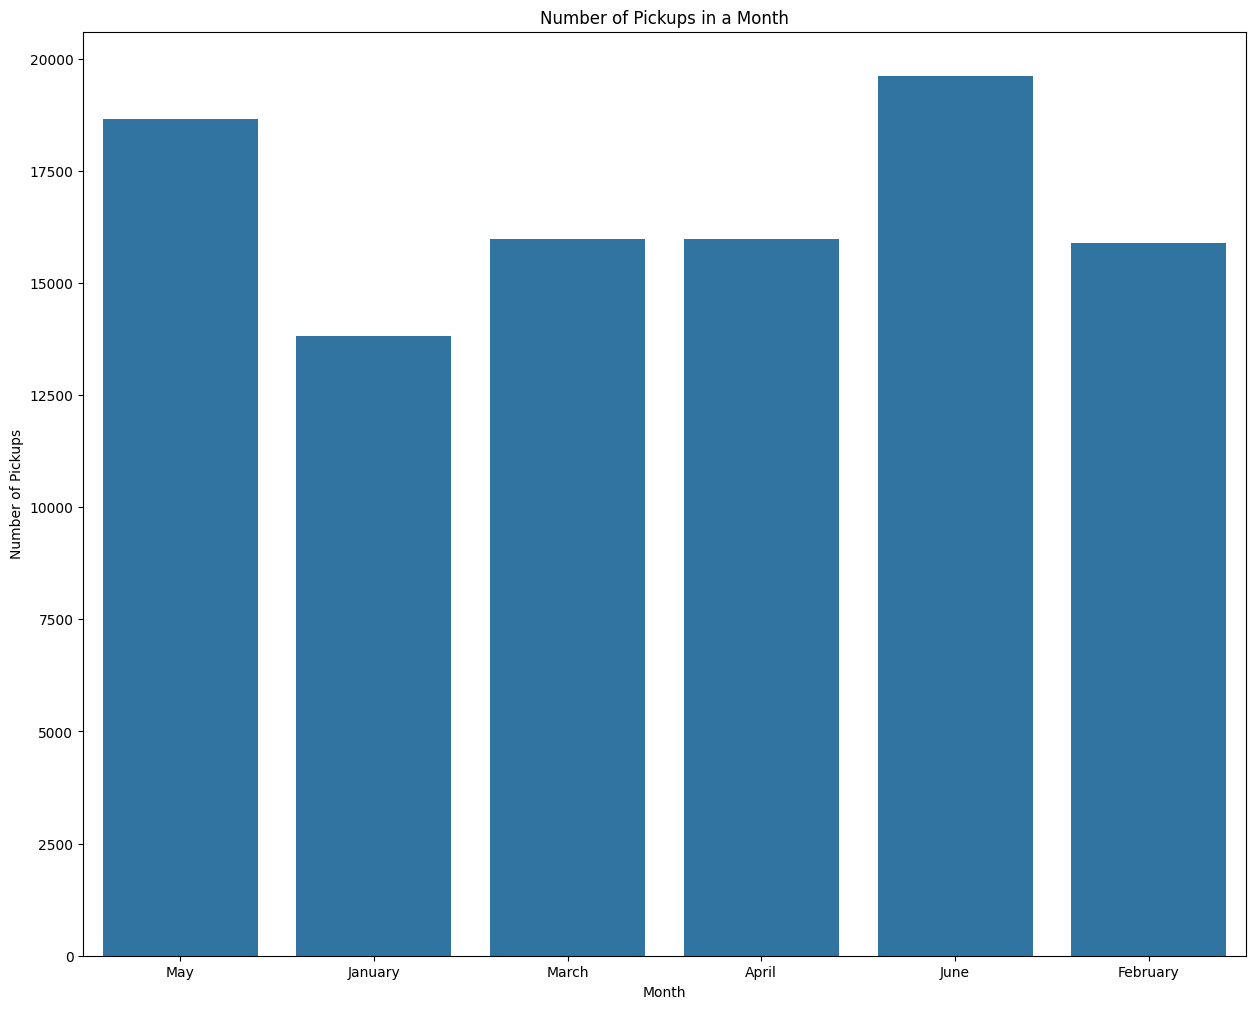

In [17]:
# Countplot of uber_15['Day']
plt.figure(figsize=(15,12))
sns.countplot(data=uber_15,x=uber_15['Month_name'])
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups in a Month')
plt.show()

<Axes: xlabel='Month_name'>

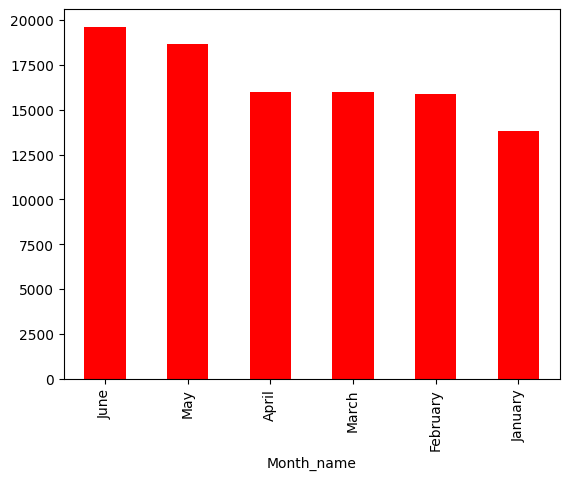

In [18]:
# simple bar plot
uber_15['Month_name'].value_counts().plot(kind='bar',color='r')

## In which day of a month occurs max. pickups?

In [19]:
# Extracting day name
uber_15['Day_name']=uber_15['Pickup_date'].dt.day_name()

In [20]:
grouped_data=uber_15.groupby('Month_name')['Day_name'].value_counts()

In [21]:
grouped_data_df=pd.DataFrame(grouped_data)

<Axes: xlabel='Month_name', ylabel='count'>

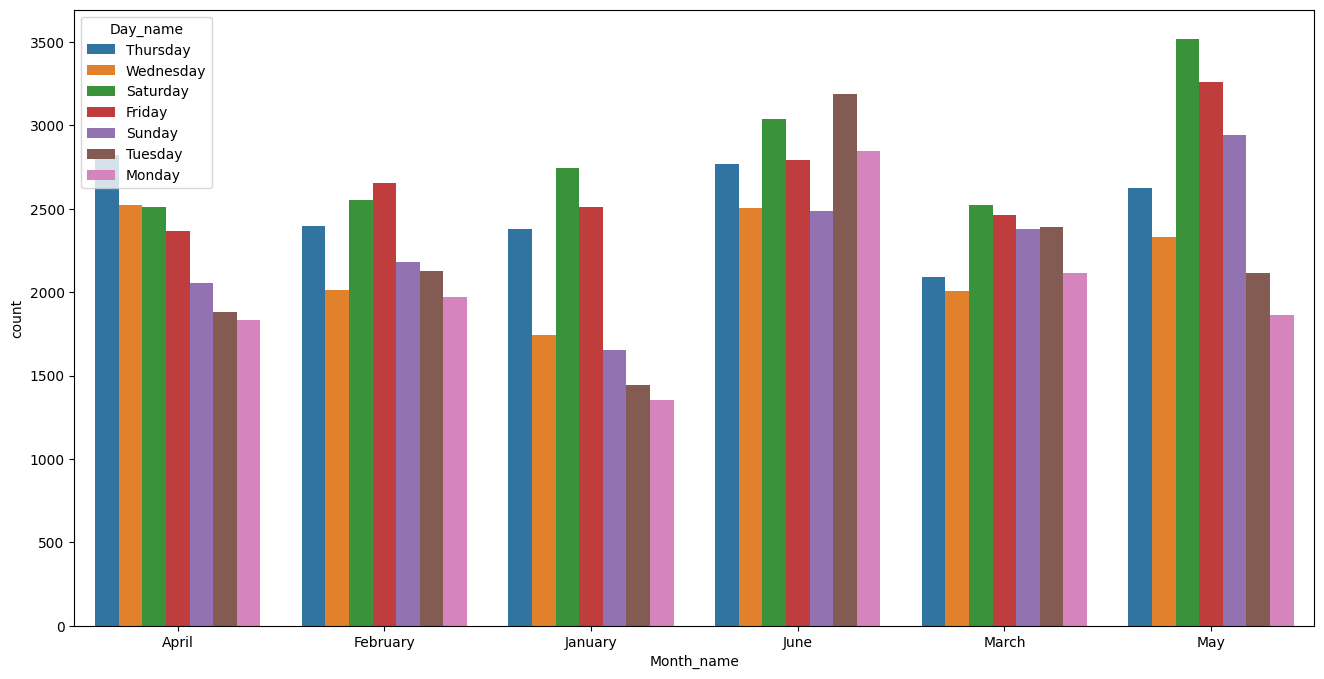

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(grouped_data_df,x='Month_name',y='count',hue='Day_name',palette='tab10')

In [23]:
## Usinng cross tabulation
pivot=pd.crosstab(index=uber_15['Month_name'],columns=uber_15['Day_name'])

<Axes: xlabel='Month_name'>

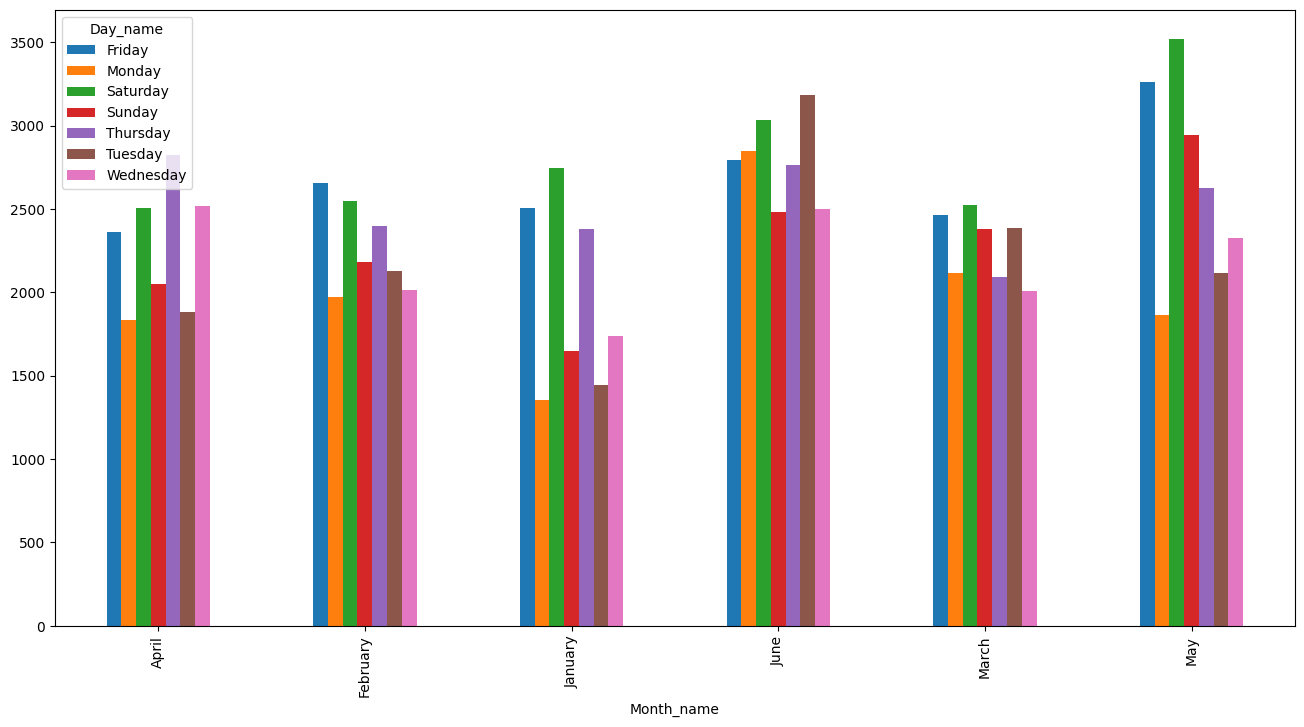

In [24]:
pivot.plot(kind='bar',figsize=(16,8))

### Let's find out Hourly Rush in New york city on all days

In [25]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Day,Month,Month_name,Year,Day_name
0,B02617,2015-05-02 21:43:00,B02764,237,2,5,May,2015,Saturday
1,B02682,2015-01-20 19:52:59,B02682,231,20,1,January,2015,Tuesday


In [26]:
#extracting the pickup hour 
uber_15['Hour']=uber_15['Pickup_date'].dt.hour

In [27]:
grouped_hour=pd.DataFrame(uber_15.groupby('Day_name')['Hour'].value_counts())


In [28]:
grouped_hour.sort_values(by='Hour',ascending=True)

,,count
Day_name,Hour,
Friday,0,581
Monday,0,339
Saturday,0,1034
Sunday,0,1115
Thursday,0,483
...,...,...
Saturday,23,1291
Friday,23,1210
Sunday,23,569


In [29]:
grouped_hour.shape

(168, 1)

In [30]:
grouped_hour.reset_index('Day_name',inplace=True)

In [31]:
grouped_hour

,Day_name,count
Hour,,
23,Friday,1210
19,Friday,1203
20,Friday,1182
18,Friday,1109
22,Friday,1108
...,...,...
1,Wednesday,232
5,Wednesday,173
2,Wednesday,103


Text(0.5, 1.0, 'Hourly Rush of The New York City')

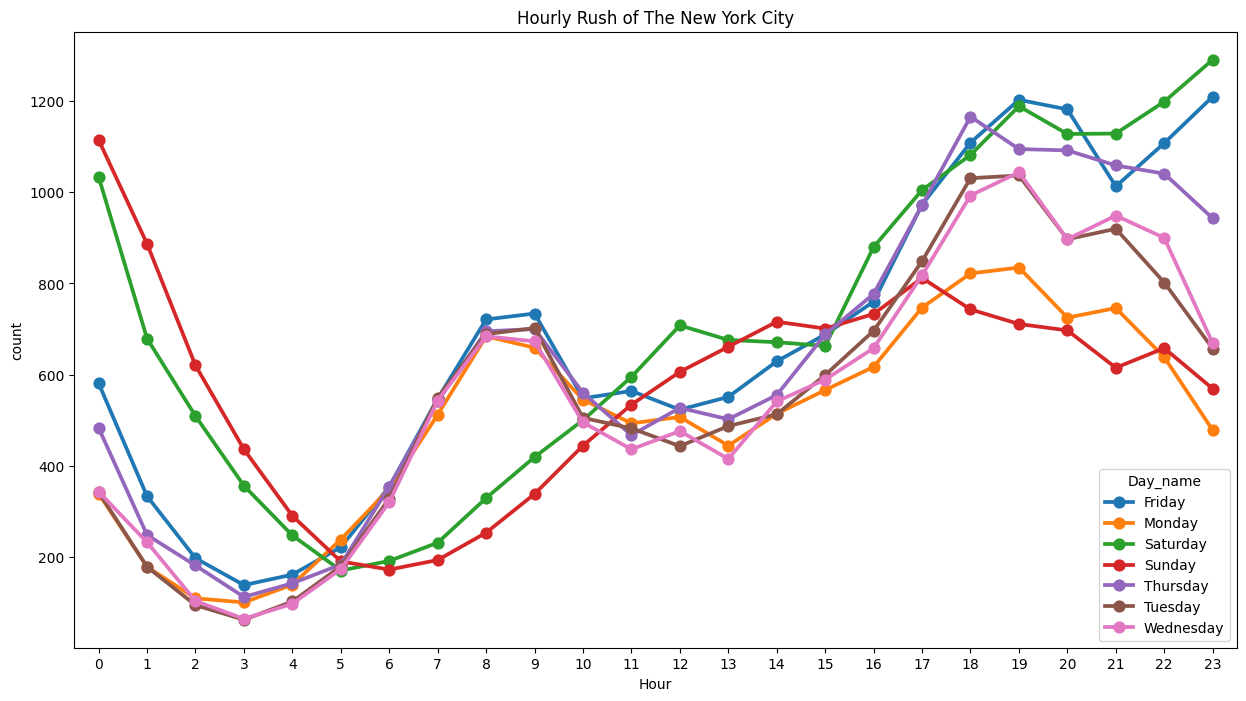

In [32]:
plt.figure(figsize=(15,8))
sns.pointplot(x='Hour',y='count',hue='Day_name',data=grouped_hour)
plt.title('Hourly Rush of The New York City')

In [33]:
uber_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Dispatching_base_num  99946 non-null  object        
 1   Pickup_date           99946 non-null  datetime64[ns]
 2   Affiliated_base_num   98830 non-null  object        
 3   locationID            99946 non-null  int64         
 4   Day                   99946 non-null  int32         
 5   Month                 99946 non-null  int32         
 6   Month_name            99946 non-null  object        
 7   Year                  99946 non-null  int32         
 8   Day_name              99946 non-null  object        
 9   Hour                  99946 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(4)
memory usage: 6.9+ MB


### Which base number has most number of active vehicle?

In [34]:
uber_foli = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

In [35]:
uber_foli.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [36]:
uber_foli['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

<Axes: xlabel='dispatching_base_number', ylabel='active_vehicles'>

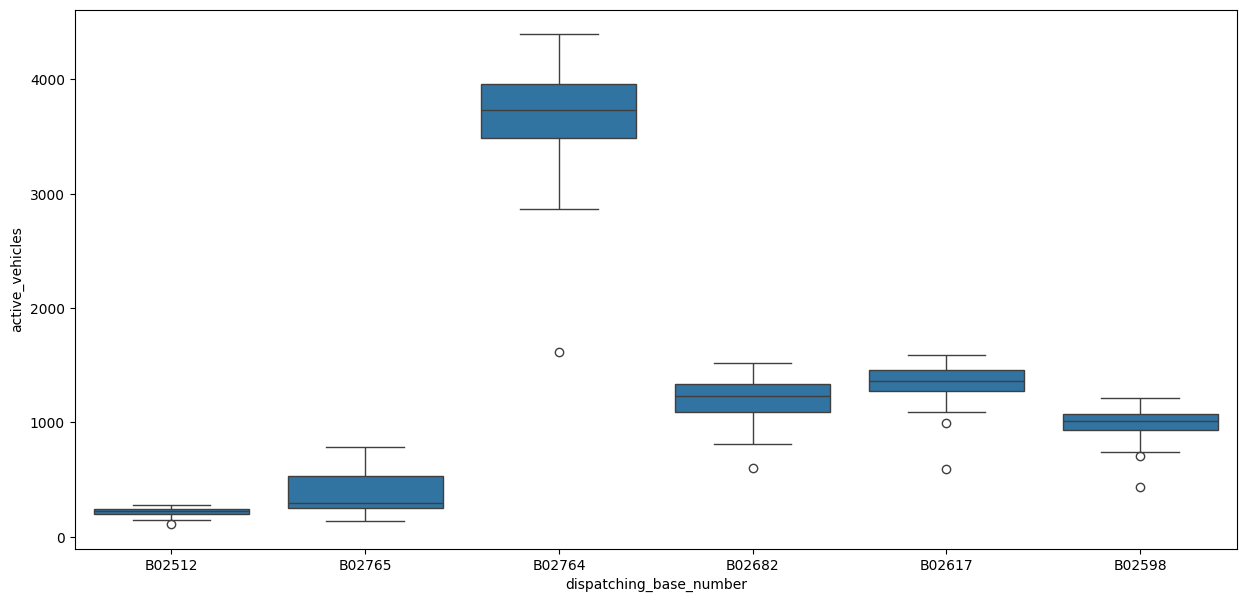

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(data=uber_foli, x='dispatching_base_number',y='active_vehicles')

In [38]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [39]:
init_notebook_mode(connected=True)

In [40]:
px.box(x='dispatching_base_number',y='active_vehicles',data_frame=uber_foli)

## Data Collection

In [41]:
files=os.listdir(r'D:\MachineLearning\Project\Datasets')[-9:]

In [42]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber_data_analysis.ipynb']

In [43]:
file_to_remove = ['uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv','uber_data_analysis.ipynb']
for file in file_to_remove:
    files.remove(file)

In [44]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [45]:
final_file = pd.DataFrame()

for file in files:
    
    final_file=pd.concat([final_file,pd.read_csv(file)],ignore_index=True)

In [46]:
final_file.shape

(4534327, 4)

In [47]:
final_file.duplicated().sum()

np.int64(82581)

In [48]:
final_file.drop_duplicates(inplace=True)

In [49]:
final_file.shape

(4451746, 4)

In [50]:
final_file.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### At what location of the new york city we are getting rush?

In [51]:
rush_data=final_file.groupby(['Lat','Lon'],as_index=False).size()

In [52]:
import folium

In [53]:
base_map=folium.Map()

In [54]:
base_map

In [55]:
from folium.plugins import HeatMap

In [56]:
HeatMap(rush_data).add_to(base_map)

In [ ]:
base_map